항성 대기 과제 

planck 분포 그리기

별주위에 disk가 있는 경우 적외선 초과

In [1]:
# import modules.
import numpy as np
import matplotlib.pyplot as plt
from math import *

In [2]:
# Define constants.
h=6.6260755*(1e-27)    #Planck constant(erg s)
k=1.380658*(1e-16)     #Boltzmaann constant(erg/K)
e=np.e                 #Euler's constant
TS=1e4                 #Temperature of star(T)
T=[250, 500, 1000]     #Temperature of each case
c=2.99793458*(1e10)    #Speed of light(cm/s)
R0=6.95508*(10**(10))  #Solar radius(cm)

Rs=10*R0                  #star radius
SS=np.pi*(Rs**2)          #square measure of star
R1=100*R0                 #Inner radius
R2=10000*R0               #Outer radius
S=np.pi*((R2**2)-(R1**2)) #square measure of disk

lamda=np.linspace(1e-6, 1e-1, 1000000)  #define range of lamda

In [3]:
#Define function that is (planck distribution)*(square measure of disk)
def B_lamda(lamda,T,square_measure):   
    B=(square_measure)*(2*h*(c**2))*(lamda**-5)/(e**((h*c)/(lamda*k*T))-1)
    return B

In [4]:
# Define list that be append result of function.
y=[]
y1=[]
y2=[]
y3=[]
x=[]

# make results whith while.
z=0
while z<len(lamda):
    a=(B_lamda(lamda[z],TS,SS))
    a1=(a+B_lamda(lamda[z],T[0],S))
    a2=(a+B_lamda(lamda[z],T[1],S))
    a3=(a+B_lamda(lamda[z],T[2],S))
    
    x.append(log10(lamda[z])) # make lamda to log scale.
    y.append(np.log10(a))
    y1.append(np.log10(a1))
    y2.append(np.log10(a2))
    y3.append(np.log10(a3))
    z+=1

<ipython-input-3-05bcf392ab65>:3: RuntimeWarning: overflow encountered in double_scalars
  B=(square_measure)*(2*h*(c**2))*(lamda**-5)/(e**((h*c)/(lamda*k*T))-1)


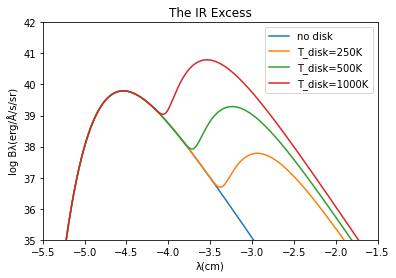

In [5]:
# plot results.
plt.axis([-5.5,-1.5, 35,42])
plt.title('The IR Excess')
plt.xlabel('λ(cm)')
plt.ylabel('log Bλ(erg/Å/s/sr)')
plt.plot(x,y,label="no disk")
plt.plot(x,y1,label="T_disk=250K")
plt.plot(x,y2,label="T_disk=500K")
plt.plot(x,y3,label="T_disk=1000K")
plt.legend(loc='best')